# Naive Bayes Classification

Configure the project. Indeed you create a dataset in csv format.

In [1]:
! rm -rf *.csv
! unzip ./dataset/archive.zip
! rm play.csv
! mv Graduate.csv data.csv

Archive:  ./dataset/archive.zip
  inflating: Graduate.csv            
  inflating: play.csv                


Import needed libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, jaccard_score
import scikitplot as skplt
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

%matplotlib inline

Read data from data.csv using pandas and store in data frame structure. Also shuffle data to have uniform distribution. 

In [3]:
df = pd.read_csv("data.csv")
df.head()
df = df.sample(frac=1.0, random_state=42).reset_index(drop=True)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,362,334,116,4,4.0,3.5,9.54,1,1
1,74,314,108,4,4.5,4.0,9.04,1,1
2,375,315,105,2,2.0,2.5,7.65,0,0
3,156,312,109,3,3.0,3.0,8.69,0,1
4,105,326,112,3,3.5,3.0,9.05,1,1


## Preprocessing

In [4]:
print(df.shape)
print(df.columns)
print(df.dtypes)

(500, 9)
Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Admit'],
      dtype='object')
Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Admit                  int64
dtype: object


In [5]:
df['Admit'].value_counts()

Admit
1    463
0     37
Name: count, dtype: int64

In [6]:
df = df.drop('Serial No.', axis=1)
categorical_attr = ['Admit']

le = LabelEncoder()
df[categorical_attr] = df[categorical_attr].apply(le.fit_transform, axis=0)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,334,116,4,4.0,3.5,9.54,1,1
1,314,108,4,4.5,4.0,9.04,1,1
2,315,105,2,2.0,2.5,7.65,0,0
3,312,109,3,3.0,3.0,8.69,0,1
4,326,112,3,3.5,3.0,9.05,1,1


In [7]:
# summarize data
df.describe() 

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.926000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.262033
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,1.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,1.000000


Print the histogram chart of data

In [8]:
print(df.columns)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Admit'],
      dtype='object')


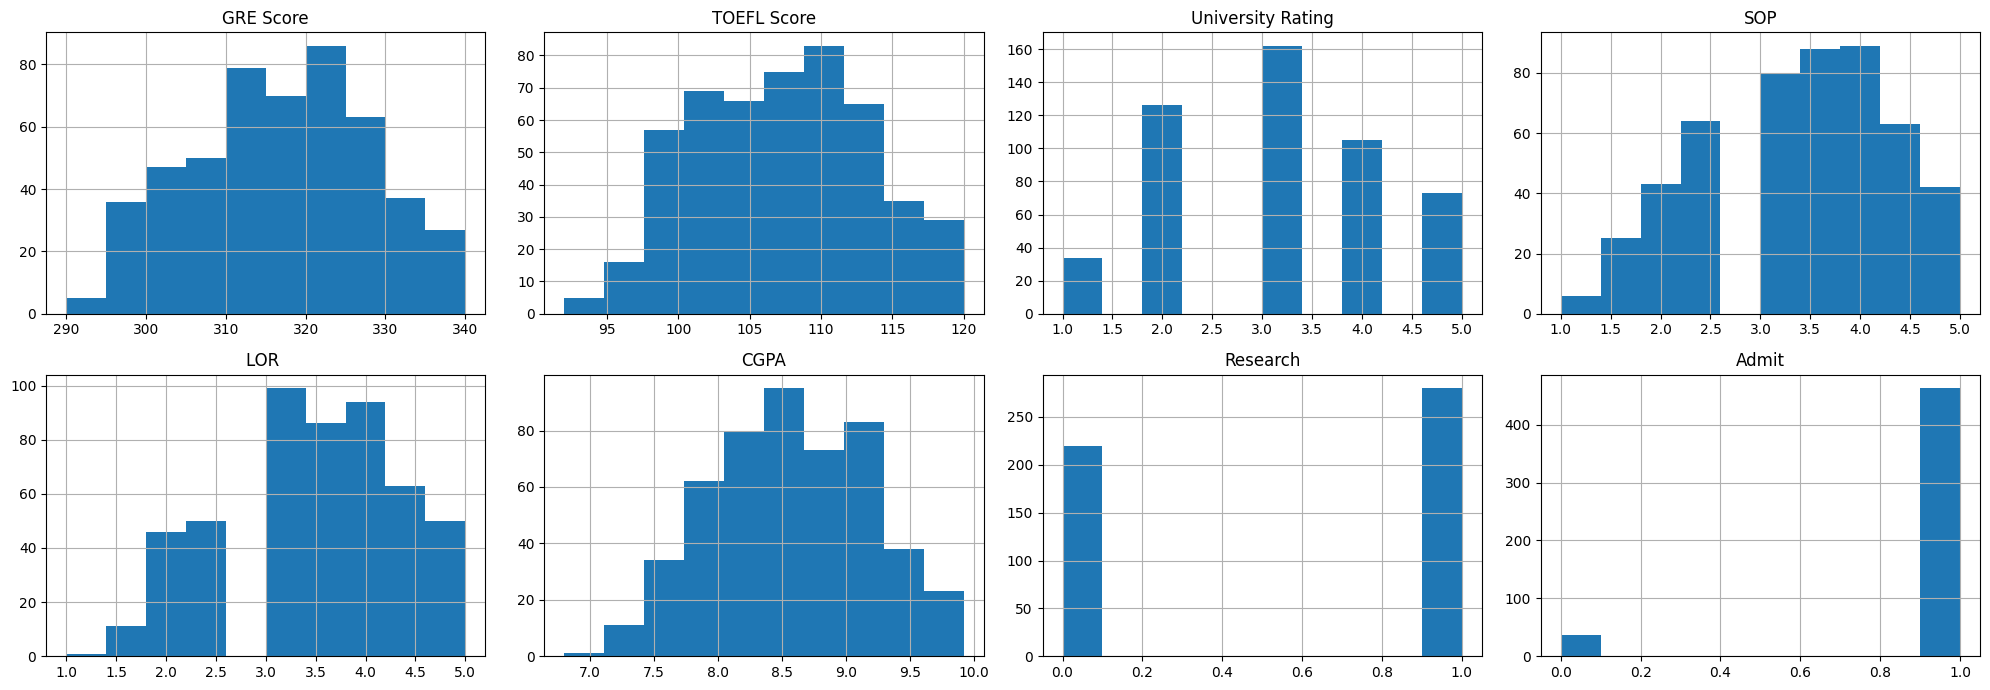

In [9]:
viz = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Admit']]
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 7))

axes = axes.flatten()

for i, column in enumerate(viz.columns):
    viz[column].hist(ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [10]:
# print(df)
train, test = train_test_split(df, test_size=0.20, random_state=42)
# test, evaluate = train_test_split(test, test_size=0.5, random_state=42)

## Fit model based on data. 

In [11]:
train_x = np.asanyarray(train[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']])
train_y = np.asanyarray(train[['Admit']])

In [12]:
test_x = np.asanyarray(test[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']])
test_y = np.asanyarray(test[['Admit']])

In [13]:
model = GaussianNB()
model.fit(train_x, train_y.ravel())
test_y_ = model.predict(test_x)


## Evaluation

In [14]:
print("The jaccard score for 0's:")
print(jaccard_score(test_y, test_y_, pos_label=0))
print("\nThe jaccard score for 1's:")
print(jaccard_score(test_y, test_y_, pos_label=1))

The jaccard score for 0's:
0.30434782608695654

The jaccard score for 1's:
0.8279569892473119



Accuracy: 0.84
Precision: 0.99
Recall: 0.84

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.88      0.47         8
           1       0.99      0.84      0.91        92

    accuracy                           0.84       100
   macro avg       0.65      0.86      0.69       100
weighted avg       0.93      0.84      0.87       100


Naive Bayes Confusion Matrix:
[[ 7  1]
 [15 77]]


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

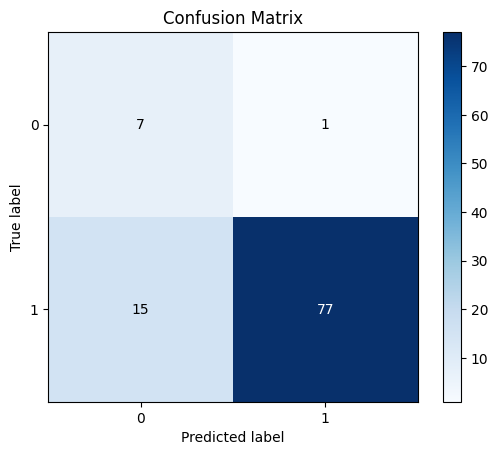

In [15]:
accuracy = accuracy_score(test_y, test_y_)
precision = precision_score(test_y, test_y_)
recall = recall_score(test_y, test_y_)

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Classification report and confusion matrix
print("\nNaive Bayes Classification Report:")
print(classification_report(test_y, test_y_))

print("\nNaive Bayes Confusion Matrix:")
print(confusion_matrix(test_y, test_y_))

# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(test_y, test_y_)

Lets solve it using random forest